In [1]:
import numpy as np
import scipy.optimize as opt
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
data = pd.read_csv("Lab10 2A.csv")
data = pd.DataFrame(data).to_numpy()
raw_time = data[:,0]
raw_volts = data[:,1]


In [22]:
volts_interp = interp1d(raw_time, raw_volts, kind="linear")

start_time = 0 + 8e-7
stop_time = .00357
step_size = 8e-7
time = np.arange(start_time, stop_time, step_size)

volts = volts_interp(time)


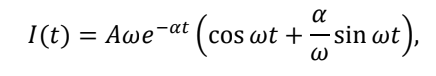

In [64]:
def strong_underdamped_fit(t, A, omega, alpha):
    return A * omega * np.exp(-alpha * t) * (np.cos(omega * t) + (alpha / omega) * np.sin(omega * t))

def strong_underdamped_exp(t, A, omega, alpha):
    return A * omega * np.exp(-alpha * t)


In [36]:
start_pars = [0, 372, 0.689]

pars, cov = opt.curve_fit(strong_underdamped_fit, time, volts, p0=start_pars)

[A, omega, alpha] = pars
[A_err, omega_err, alpha_err] = np.sqrt(np.diag(cov))

volts_pred = strong_underdamped_fit(time, A, omega, alpha)
pars


array([2.34372235e-05, 7.45420294e+03, 1.67854875e+03])

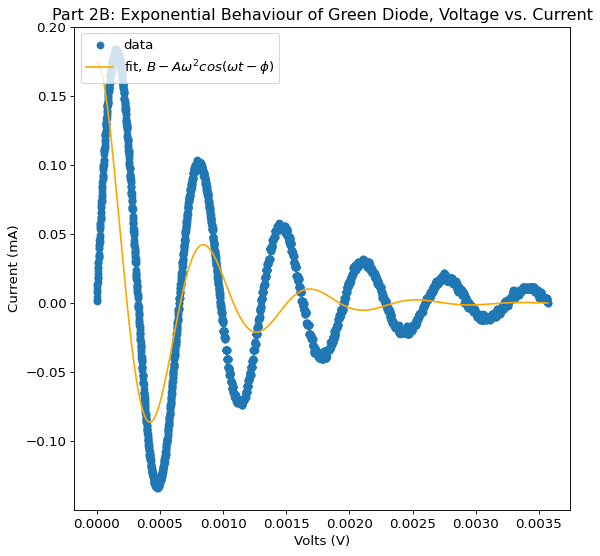

In [37]:
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.scatter(time, volts, label="data")
plt.plot(time, volts_pred, color='orange', label=r'fit, $B - A \omega ^ 2 cos(\omega t - \phi)$')

plt.title("Part 2B: Exponential Behaviour of Green Diode, Voltage vs. Current")
plt.xlabel("Volts (V)")
plt.ylabel("Current (mA)")

plt.legend(loc=2)
plt.show()


In [61]:
ms = np.array([160e-3, 480e-3, 816e-3, 1.14, 1.46, 1.79, 2.12, 2.43, 2.78, 3.10, 3.42])

mv = np.array([186, -132, 100, -74, 56, -42, 32, -22, 18, -12, 12])

ms_t = ms[::2]

mv_t = mv[::2]


In [81]:
start_pars = [0, 372, .35]

pars, cov = opt.curve_fit(strong_underdamped_exp, ms_t, mv_t, p0=start_pars)

[A, omega, alpha] = pars
# [A_err, omega_err, alpha_err] = np.sqrt(np.diag(cov))

volts_pred = strong_underdamped_exp(np.linspace(0.15,3.5), A, omega, alpha)
pars



array([4.28115020e-01, 5.00234886e+02, 9.10447301e-01])

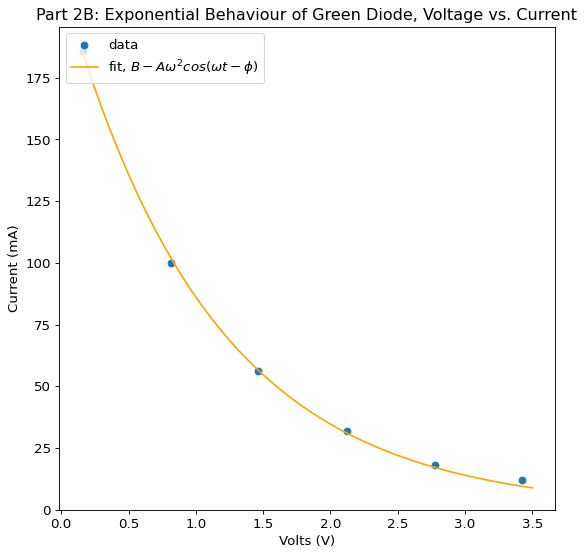

In [82]:
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.scatter(ms_t, mv_t, label="data")
plt.plot(np.linspace(0.15,3.5), volts_pred, color='orange', label=r'fit, $B - A \omega ^ 2 cos(\omega t - \phi)$')

plt.title("Part 2B: Exponential Behaviour of Green Diode, Voltage vs. Current")
plt.xlabel("Volts (V)")
plt.ylabel("Current (mA)")

plt.legend(loc=2)
plt.show()


In [83]:
pars

array([4.28115020e-01, 5.00234886e+02, 9.10447301e-01])